**<p align="center"><font size=5 color=#006600>Diplomado en Ciencia de Datos**

**<p align="center"><font size=5 color=#0000FF>Análisis de correspondencias simples**

**<font size=5 color=#0000FF>Profesores**

1. Campo Elías Pardo Turriago, cepardot@unal.edu.co 
2. Alvaro Mauricio Montenegro Díaz,ammontenegrod@unal.edu.co 
3. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com
4. Oleg Jarma, ojarmam@unal.edu.co

**<font size=5 color=#0000FF>Asesora de medios y marketing Digital**

1. Maria del Pilar Montenegro, pmontenegro88@gmail.com

# **<font size=5 color=#0000FF>Asistentes**

1. Jessica López Mejia, jelopezme@unal.edu.co

## **Contenido**

* [Introducción](#Introducción)
* [Objetivos del ACS](#Objetivos-del-ACS)
* [Ejemplo "de juguete" y notación](#Ejemplo-"de-juguete"-y-notación)
* [El ACS como dos ACP](#El-ACS-como-dos-ACP)
* [El ACS como un ACP(**X,M,N**)](#El-ACS-como-un-ACP(X,M,N))
* [Ayudas para la interpretación](#Ayudas-para-la-interpretación)
* [Filas y columnas suplementarias](#Filas-y-columnas-suplementarias)

**Nota:** los trozos de código de este cuaderno son de R

**Fuente:** Pardo CE (2020)  [PDF Estadística descriptiva multivariada](http://ciencias.bogota.unal.edu.co/fileadmin/Facultad_de_Ciencias/Publicaciones/Imagenes/Portadas_Libros/Estadistica/Estadistica_descriptiva_multivariada/libroEstadisiticaDescriptivaMultivariadaDigital.pdf).
Capítulo 5.

# Introducción

Los objetos de entrada al análisis de correspondencias simples (ACS), son tablas de contingencia y tablas de números positivos donde las transformaciones a la tabla tengan sentido. Una tabla de contingencia (TC) es una tabla de resumen de dos variables cualitativas, las filas son categorías de una variable y las columnas las categorías de la otra. Una celda $(i,j)$ cuenta los objetos que asumen simultáneamente las categorías de la fila $i$ y de la columna $j$. Las suma de una fila $i$ (columna $j$) es el total de de objetos que  asumen la categoría $i$, ($j$), estas suman se denominan marginales. 

Si se divide la fila $i$ (columna $j$) por su total, se obtiene la distribución de frecuencias relativas condicional de la fila (columna), denominada también perfil fila (columna). Son estos perfiles los que se ponen en geometría. Cuando los objetos son colectivos (países, departamentos o provincias de un país, municipios, etc.), se pueden  considerar categorías de una variable: país, departamento, municipio, etc. Entonces se pone en columnas una variable cualitiva de interés, por ejemplo, las pirámides poblacionales por rangos de edad, combinadas por género. 

Un ejemplo pequeño de una tabla de interés para describir mediante el ACS es una tabla del producto interno bruto (PIB) clasificado según *departamentos* $\times$ *subsectores de la economía*. La suma de las filas es la distribución del PIB por departamentos y la de las columnas la distribución del PIB por subsectores de la economía, el total de la tabla es el PIB del país. Los perfiles fila son las distribuiones del PIB en cada uno de los departamentos según los subsectores de la economía. Los perfiles columna son las distribuciones de los subsectores de la economía según los departamenos.

[Volver al inicio](#Contenido)

# **Objetivos del ACS**

Explorar y describir tablas de contingencia (TC), tablas de frecuencias y algunas tablas de números positivos.

- Comparar los perfiles fila.
- Comparar los perfiles columna.
- Estudiar las correspondencias entre perfiles fila y columna.

Adicionalmente:

- Cuantificación de las categorías fila y columna
- Reducción de la dimensión
- Filtro: separar información de ruido.

El ACS se puede ver como:
- Dos ACP:  uno de los perfiles fila y otro de perfiles columna, que se superponen.
- Un ACP de los desvíos de la tabla de frecuencias relativas a la tabla del modelo de independencia.


[Volver al inicio](#Contenido)

# **Ejemplo "de juguete" y notación**

- Ejemplo TC de los 445 admitidos: 7 carreras $\times$ 4 edades
- La tabla de contingencia.


In [1]:
library(FactoClass)

Loading required package: ade4

Loading required package: ggplot2

Loading required package: ggrepel

Loading required package: xtable

Loading required package: scatterplot3d



In [2]:
data(admi)
cat("\nExtracto de tabla admi, dimensión",dim(admi))
admi[seq(1,445,44),] # un extracto de la tabla


Extracto de tabla admi, dimensión 445 15

,carr,mate,cien,soci,text,imag,exam,gene,estr,orig,edad,niLE,niMa,stra,age
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,Biol,12.03,10.84,12.08,10.62,10.68,696.4424,F,alto,Bogo,a17,noLE,siMa,E4,17
45,Biol,11.21,11.16,11.36,12.35,11.26,701.0641,F,medio,Bogo,a16m,noLE,siMa,E3,16
89,Esta,9.68,10.51,11.71,13.56,10.96,652.5703,F,bajo,Bogo,a19M,noLE,siMa,E2,20
133,Farm,10.64,12.45,10.70,10.62,11.60,679.3191,F,medio,Bogo,a16m,noLE,siMa,E3,16
177,Farm,10.64,9.37,10.38,10.91,10.68,546.9806,F,bajo,Otro,a16m,siLE,siMa,E2,16
221,Fisi,11.21,12.12,12.48,12.35,10.96,763.0880,M,alto,Bogo,a17,noLE,siMa,E5,17
265,Fisi,10.64,10.16,11.36,11.92,12.54,670.9812,M,medio,Bogo,a19M,noLE,siMa,E3,20
309,Geol,12.03,11.16,11.03,11.54,10.68,689.3005,M,bajo,Otro,a16m,siLE,siMa,E1,15
353,Mate,11.48,13.17,10.05,11.21,10.96,706.0888,M,bajo,Bogo,a19M,noLE,siMa,E2,44


#### **Tabla de contingencia**

In [3]:
#TC "de juguete" como ejemplo
K<-unclass(table(admi$carr,admi$edad))
cat("\nTabla de contingencia y marginales fila y columna, dimensión",dim(K))
addmargins(K) 


Tabla de contingencia y marginales fila y columna, dimensión 7 4

,a16m,a17,a18,a19M,Sum
Biol,15,27,9,12,63
Esta,18,28,5,15,66
Farm,18,26,15,14,73
Fisi,21,34,12,15,82
Geol,11,25,2,7,45
Mate,11,14,5,23,53
Quim,24,17,8,14,63
Sum,118,171,56,100,445


#### Notación

Tabla de contingencia $\mathbf{K}$
- Termino general $k_{ij}$ 
- Marginal de filas  $k_{i \cdot}$ 
- Marginal de columnas $k_{\cdot j}$ 
- Total  $k=k_{\cdot\cdot}$

#### **Tabla de frecuencias relativas**

In [4]:
F<-K/sum(K)
cat("\nTabla de frecuencias relativas, en porcentaje")
addmargins(round(F*100,2))


Tabla de frecuencias relativas, en porcentaje

,a16m,a17,a18,a19M,Sum
Biol,3.37,6.07,2.02,2.70,14.16
Esta,4.04,6.29,1.12,3.37,14.82
Farm,4.04,5.84,3.37,3.15,16.40
Fisi,4.72,7.64,2.70,3.37,18.43
Geol,2.47,5.62,0.45,1.57,10.11
Mate,2.47,3.15,1.12,5.17,11.91
Quim,5.39,3.82,1.80,3.15,14.16
Sum,26.50,38.43,12.58,22.48,99.99


Tabla de frecuencias relativas $\mathbf{F} = \frac{1}{k}\mathbf{K}$

- Termino general $f_{ij}=\frac{k_{ij}}{k}$ 
- Marginal de filas  $f_{i \cdot}$ 
- Marginal de columnas $f_{\cdot j}$ 
- Total  $f_{\cdot\cdot}=1$

[Volver al inicio](#Contenido)

## Perfiles fila

Sea $\mathbf{D}_n = diag(f_{i \cdot})$, los perfiles fila son $\mathbf{D}_n^{-1} \mathbf{F}$:



In [5]:
# valores marginales por filas
Dn <- diag(rowSums(F))
cat("\nMatriz diagonal con los valores maginales fila, en porcentaje")
round(Dn*100,1)


Matriz diagonal con los valores maginales fila, en porcentaje

14.2,0.0,0.0,0.0,0.0,0.0,0.0
0.0,14.8,0.0,0.0,0.0,0.0,0.0
0.0,0.0,16.4,0.0,0.0,0.0,0.0
0.0,0.0,0.0,18.4,0.0,0.0,0.0
0.0,0.0,0.0,0.0,10.1,0.0,0.0
0.0,0.0,0.0,0.0,0.0,11.9,0.0
0.0,0.0,0.0,0.0,0.0,0.0,14.2



Perfiles fila en porcentaje

,a16m,a17,a18,a19M,Sum
Biol,23.8,42.9,14.3,19.0,100
Esta,27.3,42.4,7.6,22.7,100
Farm,24.7,35.6,20.5,19.2,100
Fisi,25.6,41.5,14.6,18.3,100
Geol,24.4,55.6,4.4,15.6,100
Mate,20.8,26.4,9.4,43.4,100
Quim,38.1,27.0,12.7,22.2,100


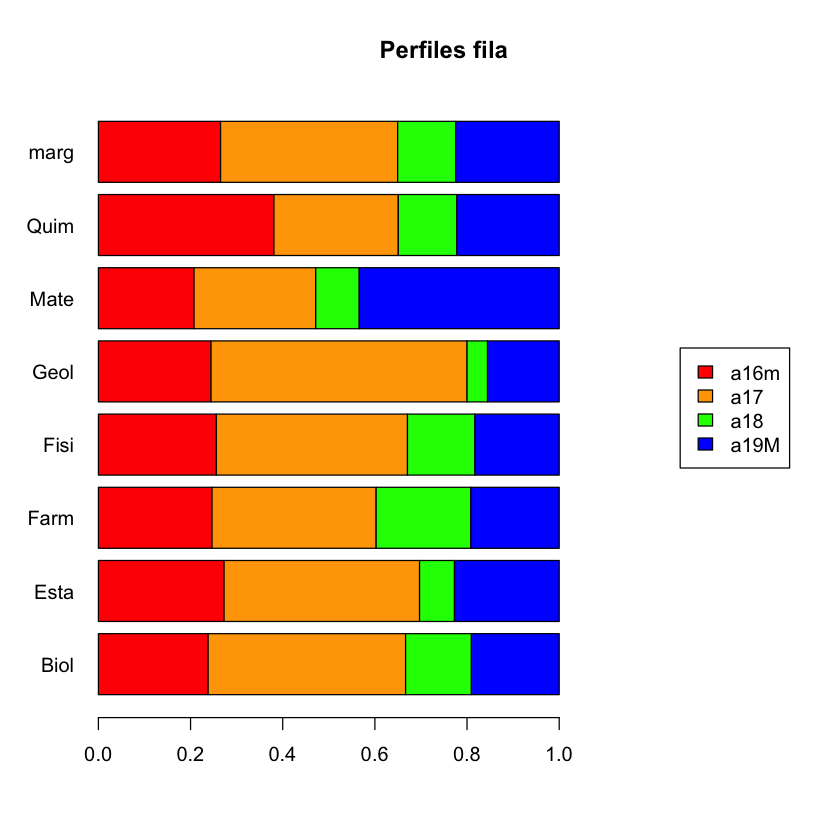

In [6]:
# perfil fila
perFila <- solve(Dn)%*%F
rownames(perFila)<-rownames(F)
colnames(perFila)<-colnames(F)
cat("\nPerfiles fila en porcentaje")
round(addmargins(perFila*100,2),1)

# gráfica de los perfiles,  plotct es función de FactoClass
plotct(K,"row",col=c("red","orange","green","blue"),main="Perfiles fila")

## Perfiles columna

Sea $\mathbf{D}_p = diag(f_{\cdot j})$, los perfiles columna son $\mathbf{D}_p^{-1} \mathbf{F'}$ (puestos como filas): 


In [7]:
cat("\nMatriz diagonal con los maginales columna en porcentaje")
Dp<-diag(colSums(F))
round(Dp*100,1)


Matriz diagonal con los maginales columna en porcentaje

26.5,0.0,0.0,0.0
0.0,38.4,0.0,0.0
0.0,0.0,12.6,0.0
0.0,0.0,0.0,22.5



Perfiles columna en porcentaje

Biol,12.7,15.8,16.1,12
Esta,15.3,16.4,8.9,15
Farm,15.3,15.2,26.8,14
Fisi,17.8,19.9,21.4,15
Geol,9.3,14.6,3.6,7
Mate,9.3,8.2,8.9,23
Quim,20.3,9.9,14.3,14
Sum,100.0,100.0,100.0,100


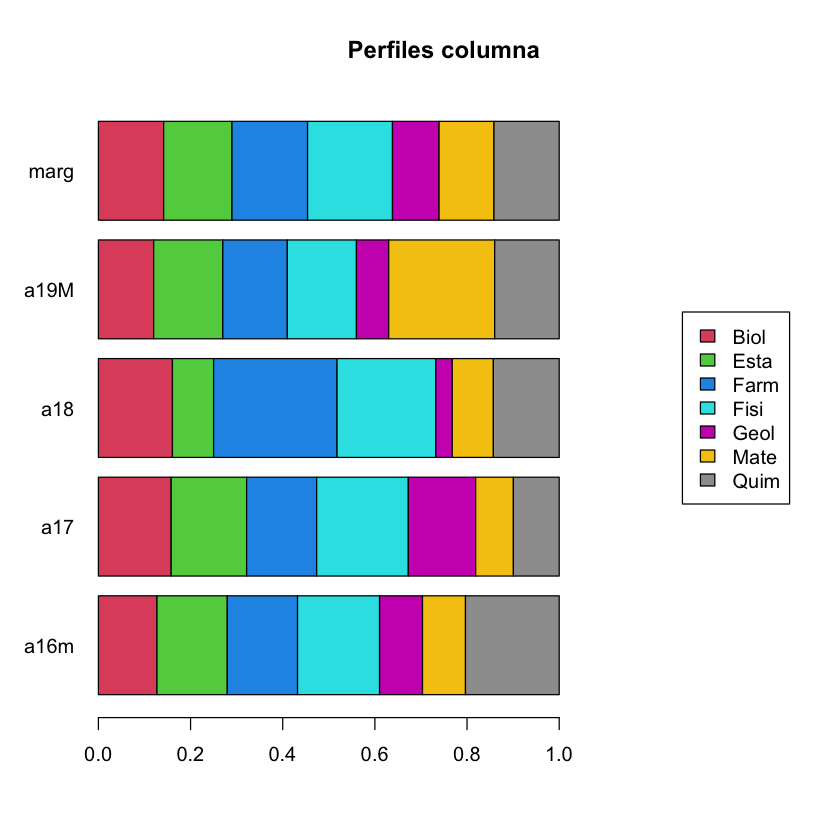

In [8]:
perColum <- F%*%solve(Dp)
cat("\nPerfiles columna en porcentaje")
round(addmargins(perColum,1)*100,1)
plotct(t(K),"row",col=2:8,main="Perfiles columna") 

[Volver al inicio](#Contenido)

## El modelo de independencia
Sea $a_{ij}=f_{i\cdot}f_{\cdot j}$, el término general de la tabla de independencia $\mathbf{A}$ 


In [9]:
A<-diag(Dn)%*%t(diag(Dp)) #modelo de independencia
colnames(A)<-colnames(F); rownames(A)<-rownames(F)
cat("\nTabla de frecuencias relativas en porcentaje")
round(F*100,1)
cat("\nTabla del modelo de independencia en porcentaje")
round(A*100,1)
cat("\nTabla del desvios al modelo de independencia en porcentaje")
round((F-A)*100,2)


Tabla de frecuencias relativas en porcentaje

,a16m,a17,a18,a19M
Biol,3.4,6.1,2.0,2.7
Esta,4.0,6.3,1.1,3.4
Farm,4.0,5.8,3.4,3.1
Fisi,4.7,7.6,2.7,3.4
Geol,2.5,5.6,0.4,1.6
Mate,2.5,3.1,1.1,5.2
Quim,5.4,3.8,1.8,3.1



Tabla del modelo de independencia en porcentaje

,a16m,a17,a18,a19M
Biol,3.8,5.4,1.8,3.2
Esta,3.9,5.7,1.9,3.3
Farm,4.3,6.3,2.1,3.7
Fisi,4.9,7.1,2.3,4.1
Geol,2.7,3.9,1.3,2.3
Mate,3.2,4.6,1.5,2.7
Quim,3.8,5.4,1.8,3.2



Tabla del desvios al modelo de independencia en porcentaje

,a16m,a17,a18,a19M
Biol,-0.38,0.63,0.24,-0.48
Esta,0.11,0.59,-0.74,0.04
Farm,-0.31,-0.46,1.31,-0.54
Fisi,-0.17,0.56,0.38,-0.77
Geol,-0.21,1.73,-0.82,-0.70
Mate,-0.69,-1.43,-0.38,2.49
Quim,1.64,-1.62,0.02,-0.04


**En el modelo de independencia los perfila fila y columna son iguales a los marginales**

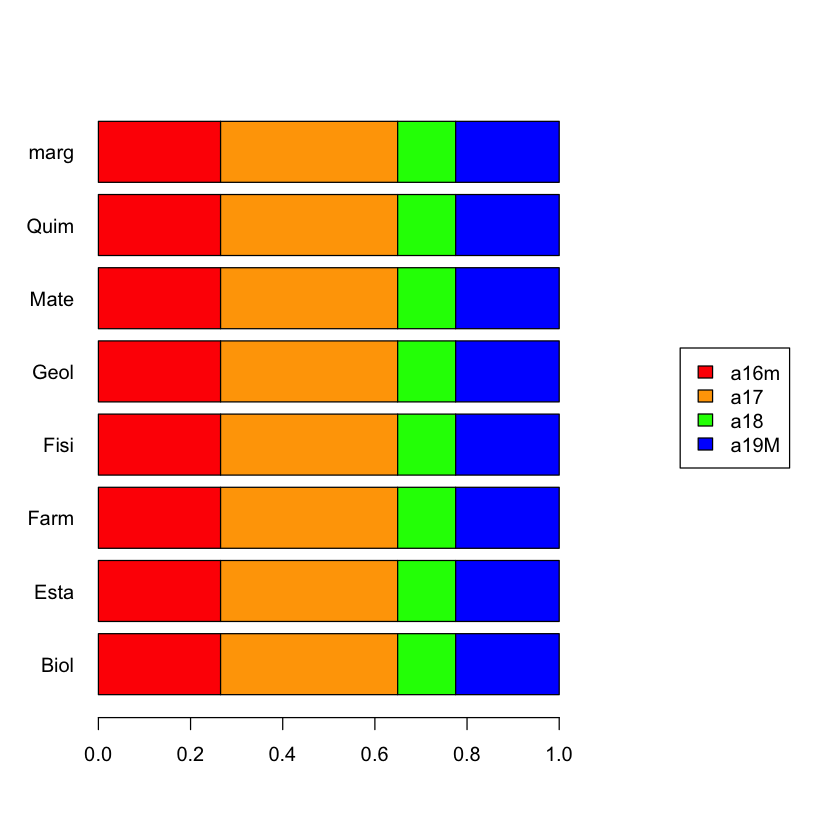

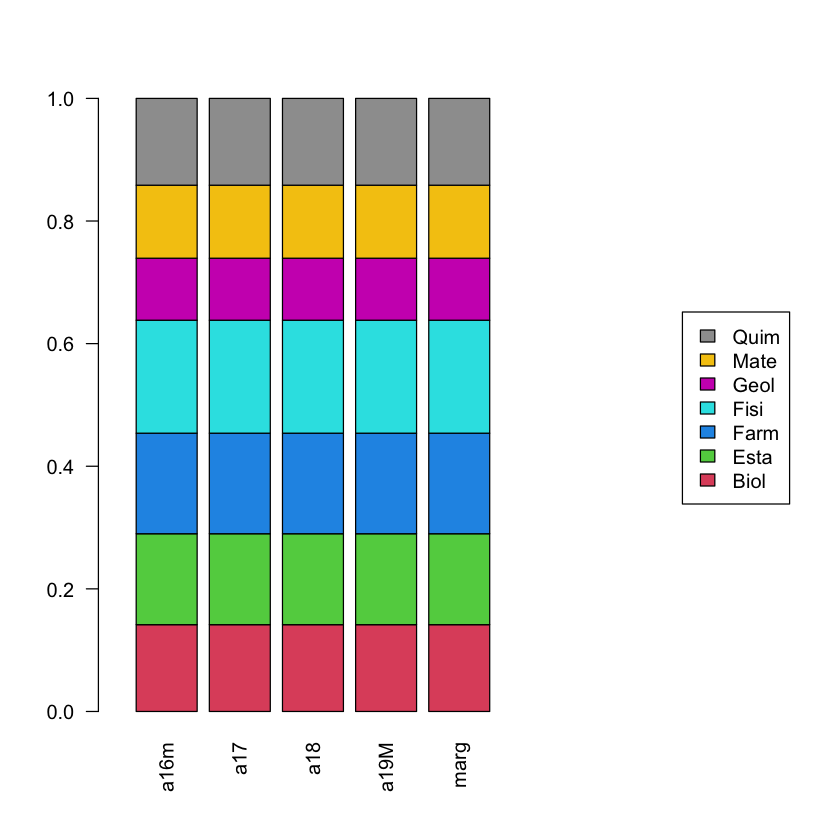

In [10]:
# perfiles fila y columna en el modelo de independencia
plotct(A,"row",col=c("red","orange","green","blue")) 
plotct(A,"col",col=2:8)

Las distribuciones marginales fila (columna) están en centro de la representación geométrica de las columnas (filas). El ACS va más allá de la prueba de independencia que se suele hacer para las tablas de contingencia, ya que describe las dependencias entre categorías fila y columna, al comparar perfiles fila y columna derivados de la tabla.

[Volver al inicio](#Contenido)

# **El ACS como dos ACP**

En el ACS (*Análisis de Correspondencias Simples*) se describen simultáneamente los perfiles fila y columna. Para cada tabla de perfiles se realiza un **ACP(X, M, N)**, pero los dos ACP (*Análisis de componentes principales*) están
relacionados, lo que permite representaciones simultáneas de los planos factoriales.

## ACP de los perfiles-fila
$$
ACP(\mathbf{X,M,N}) = ACP(\mathbf{D}_n^{-1}\mathbf{F},\mathbf{D}^{-1}_p,\mathbf{D_n})
$$

![Diagrama de dualidad del ACS de los perfiles filas](../Imagenes/DuDiACSfilas.png)

La matriz a diagonalizar (hallarle valores y vectores propios) es:

$$
\mathbf{F'D}_n^{-1} \mathbf{D}_n \mathbf{D}_n^{-1} \mathbf{F} \mathbf{D}_p^{-1}
= \mathbf{F'D}_n^{-1} \mathbf{F} \mathbf{D}_p^{-1} 
$$

- Las coordenadas de los puntos son las filas dela tabla  $\mathbf{D}_n^{-1}\mathbf{F}$, es decir que cada histograma (perfil) se respresenta por un punto en $\mathbb{R}^p$.
- La diferencia entre dos histogramas = distancia entre los puntos en $\mathbb{R}^p$.
- Los pesos de los puntos fila: $f_{i\cdot}$ están en la  la matriz diagonal $\mathbf{D_n}$.
- Las distancias entre distribuciones condicionales se definen a partir del producto punto dado por la matriz $\mathbf{D}^{-1}_p$.
- La matriz $\mathbf{D}_n^{-1}\mathbf{F}$ no está centrada.
- El mayor valor propio de la matriz a diagonalizar $\mathbf{F'D_n^{-1}FD_p^{-1}}$ es 1 y el vector propio asociado es el centro de gravedad de la nube.
- Partir del segundo vector propio de esta matriz es equivalente a centrar, logrando una simplificación de las fórmulas del ACS.


### Nube de perfiles fila 

- Coordenadas de los perfiles fila son: $\mathbf{x}_i; i=1,2,\cdots,n$; con:
$$ \mathbf{x}_i(j) = \dfrac{f_{ij}}{f_{i\cdot}}; \ j=1,2,\cdots,p$$
    - Si tomamos $i=3$, se obtiene el perfil de Farmacia cuyas coordenadas son:

In [11]:
round(perFila[3,],3)

a16m   a17   a18  a19M 
0.247 0.356 0.205 0.192

- Centro de gravedad:
$$ \mathbf{g}_p = \sum_{i=1}^n f_{i\cdot} \mathbf{x}_i$$
    - La coordenada $j$, notada $ \mathbf{g}_p(j)$, del centro de gravedad es:
$$ 
\mathbf{g}_p(j)=\sum_{i=1}^n f_{i\cdot} \dfrac{f_{ij}}{f_{i\cdot}} = \sum_{i=1}^n f_{ij} = f_{\cdot j}
$$
Lo que indica que el centro de gravedad $\mathbf{g}_p$ es la distribución marginal columna (suma vertical) de la tabla de frecuencias relativas $\mathbf{F}$
    - Centro de gravedad = Marginal columna de la tabla **F**, en el ejemplo es: 

In [12]:
round(colSums(F),3)      

a16m   a17   a18  a19M 
0.265 0.384 0.126 0.225

- Distancia entre perfiles fila = distancia $ji$ cuadrado o de Benzècri:
la métrica es $\mathbf{D}^{-1}_p$, elemento diagonal  $\dfrac{1}{f_{\cdot j}}$
$$  
d^2(i,l)=\sum_{j=1}^p \dfrac{1}{f_{\cdot j}} (x_{ij}-x_{lj})^2 =
\sum_{j=1}^p \dfrac{1}{f_{\cdot j}} \left(\dfrac{f_{ij}}{f_{i\cdot}}-\dfrac{f_{lj}}{f_{l\cdot}}\right)^2
$$

    -  amplifica más las diferencias al cuadrado entre coordenadas cuando se deben a columnas de baja frecuencia marginal. 
    - La distancia $ji$ cuadrado le confiere al ACS dos propiedades: 
        + La equivalencia distribucional 
        + Las relaciones cuasi-baricéntricas,
        
&nbsp;

- Inercia de la nube de perfiles fila:
$$
Inercia(N_n) = \sum_{i=1}^n f_{i\cdot } d^2(i,\mathbf{g}_p)=
\sum_{i=1}^n f_{i\cdot } \sum_{j=1}^p \dfrac{1}{f_{\cdot j}} \left(\dfrac{f_{ij}}{f_{i\cdot}}-f_{\cdot j}\right)^2
$$
$$
=
\sum_{i=1}^n \sum_{j=1}^p  \frac{\left(f_{ij} - f_{i\cdot}f_{\cdot j}\right)^2}{f_{i\cdot}f_{\cdot j}}
$$

In [13]:
inerciaNn=sum((F-A)^2/F)
cat("\nLa inercia de la nube Nn es: ",round(inerciaNn,4))


La inercia de la nube Nn es:  0.0743

[Volver al inicio](#Contenido)

###  Ejes y subespacios vectoriales
Se obtienen con el procedimiento ACP generalizado descrito, que para el caso de las filas son los perfiles fila derivados de la tabla de contingencia y con pesos iguales a la marginal fila (suma horizontal) de al tabla de frecuencias relativas $\mathbf{F}$. Las distancias son las sumas al cuadrado de las diferencias de los perfiles ponderadas por el inverso de las marginales columna de la tabla $\mathbf{F}$

Con la función *dudi.coa{ade4}* se tiene el objeto con todos los resultados del ACS.

#### Esquema de la función dudi.coa de ade4

![Función dudi.coa de ade4](../Imagenes/Diagdudicoa.png)

### ACS de la tabla de contingencia $\mathbf{K}$ $carreras \times edades$

In [14]:
acs<-dudi.coa(K,scannf=FALSE)

#### Perfiles fila de K

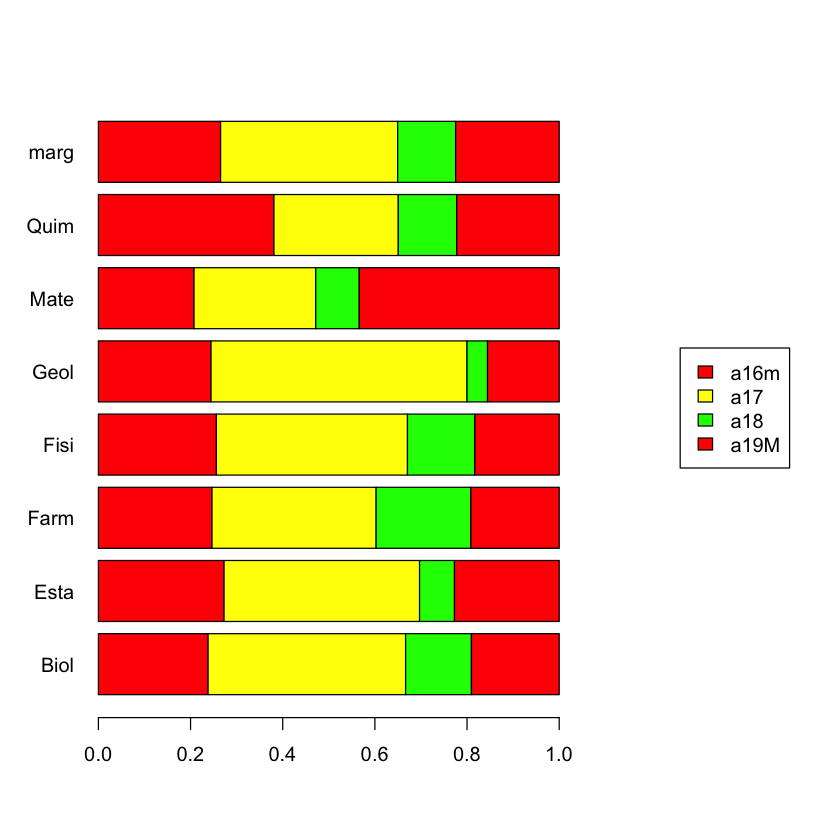

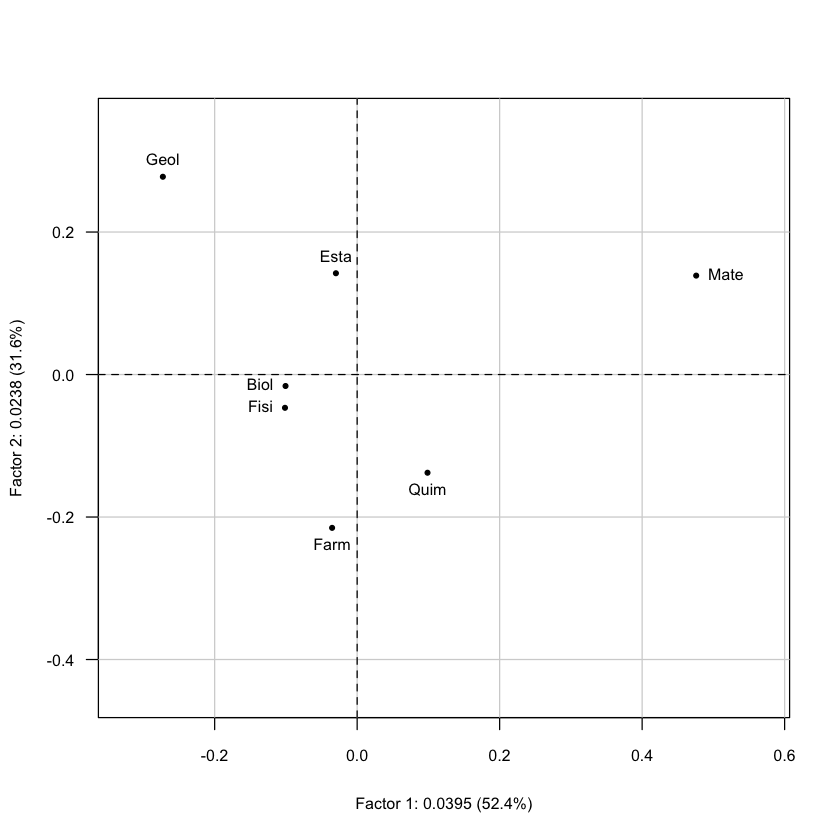

In [15]:
plotct(K,"row",col=c("red","yellow","green"))
plot(acs,Tcol=FALSE)#,xlim=c(-0.7,0.3),cframe=1,asp=1)

Los perfiles de Estadística, Matemáticas y Farmacia son bastante parecidos; el de Química un poco menos a estos. El de Biología parecido al de Física y Geología diferente a todos y el menos parecido al perfil marginal. Esto se puede corroborar con la gráfica de perfiles fila (arriba)

[Volver al inicio](#Contenido)

## ACP de los perfiles-columna


 ${\Large \qquad\qquad ACP(\mathbf{D}_p^{-1}\mathbf{F'},\mathbf{D}_n^{-1},\mathbf{D}_p)}$


![Diagrama de dualidad del ACP de los perfiles columna](../Imagenes/DuDiACScolumnas.png)

La matriz a diagonalizar (hallarle valores y vectores propios) es:

$${\large
\mathbf{FD}_p^{-1} \mathbf{D}_p \mathbf{D}_p^{-1} \mathbf{F'} \mathbf{D}_n^{-1}
= \mathbf{FD}_p^{-1} \mathbf{F'} \mathbf{D}_n^{-1} 
}$$

 
- Los histogramas de las distribuciones condicionales columna se representan como puntos en $\mathbb{R}^n$
-  A cada punto $j$ se le asigna el peso $f_{\cdot j}$
-  Este análisis es simétrico al de perfiles fila  

### Primer plano factorial de los perfiles de las edades según carreras :


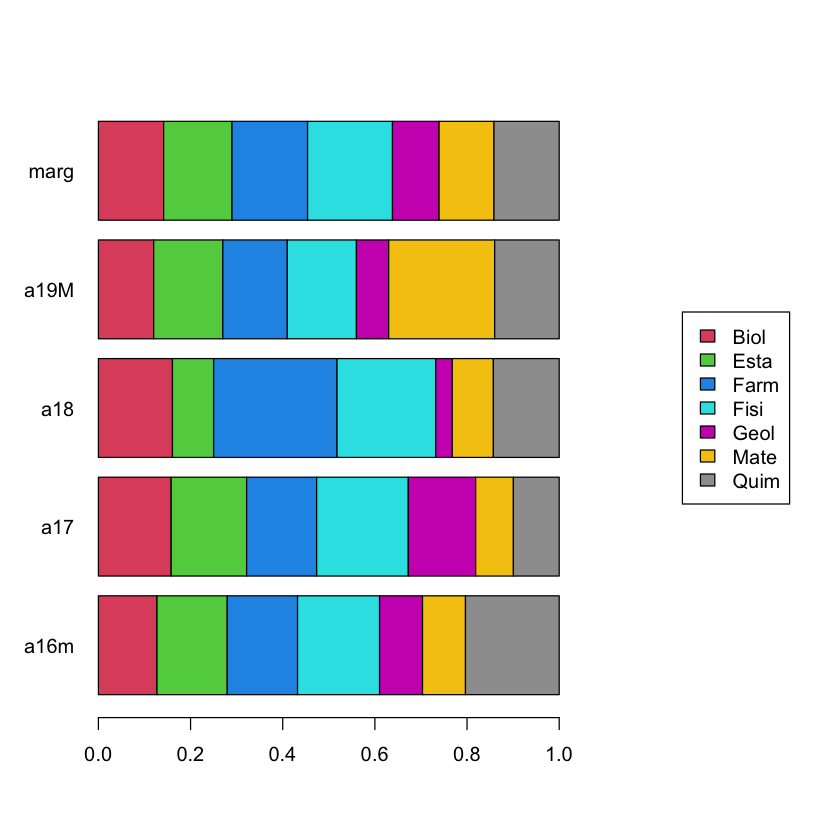

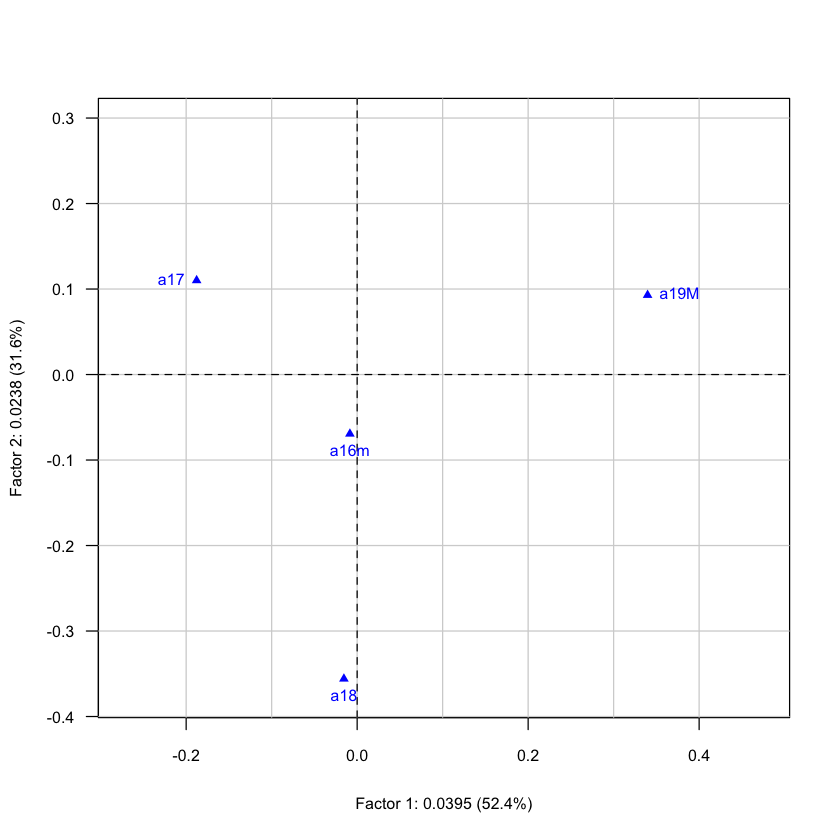

In [16]:
plotct(t(K),"row",col=2:8)
plot(acs,Trow=FALSE,asp=1,cframe=1) 

El perfil *a19M* es el más diferente del promedio y *a16m* el más parecido. Las tres categorías de más edad están ordenadas en el primer eje.

[Volver al inicio](#Contenido)

# **El ACS como un ACP(X,M,N)**

El ACS como un ACP es el de los desvios del modelo de independencia.

- El ACS de la tabla $\mathbf{F}$ también se obtiene mediante el ACP de
la tabla $\mathbf{X}$ 
- Usando $\mathbf{N}=\mathbf{D}_n=diag(f_{i\cdot})$, como pesos de las filas y matriz de métrica en el espacio de las columnas.
- Usando $\mathbf{M}=\mathbf{D}_p=diag(f_{\cdot j})$, como pesos de las columnas y matriz de métrica en el espacio de las filas.
- Y usando 
$$
x_{ij} =\frac{f_{ij} -f_{i\cdot} f_{\cdot j} }{f_{i\cdot} f_{\cdot j} }
= \frac{f_{ij}}{f_{i\cdot} f_{\cdot j}} - 1
$$

El vector de $n$ unos es el centro de gravedad, se puede hacer el ACP sin centrar y descartar el mayor valor propio $1$ y su vecor propio asociado: el vector de $n$ unos.

![Diagrama de dualidad ACS como un ACP](../Imagenes/DuDiACSunACP.png)

La matriz a diagonalizar (hallarle valores y vectores propios) es:

$${\large
\mathbf{D}_p^{-1} \mathbf{F'} \mathbf{D}_n^{-1}\mathbf{D}_n \mathbf{D}_n^{-1} \mathbf{F} \mathbf{D}_p^{-1}
\mathbf{D}_p = \mathbf{D}_p^{-1} \mathbf{F'} \mathbf{D}_n^{-1} \mathbf{F}
}$$

## Equivalencia distribucional
- El ACS no se modifica si se unen dos puntos que tienen el mismo perfil. 
- El peso del punto colapsado es la suma de los pesos de los puntos que se unen.
- Lo anterior permite unir filas o columnas con perfiles parecidos, para simplificar las tablas originales
    - Por ejemplo las carreras Estadística, Matemáticas y Farmacia; o las carreras Biología y Física 
- Esta propiedad hace que el ACS sea robusto ante la "arbitrariedad" en la conformación de las categorías de una variable en un estudio


## Relaciones cuasibaricéntricas

De las relaciones de transición del ACP generalizado:

- Una coordenada de la fila en función de las coordenadas de las columnas

$$
F_s(i)=\dfrac{1}{\sqrt{\lambda_s}}\sum\limits_{j=1}^p{x_{ij}m_j}G_s(j)
= \dfrac{1}{\sqrt{\lambda_s}}\sum\limits_{j=1}^p \frac{f_{ij}}{f_{i\cdot}f_{\cdot j} } f_{\cdot j} G_s(j)
= \frac{1}{\sqrt{\lambda_s}}\sum_{j=1}^p{\frac{f_{ij}}{f_{i\cdot}} G_s(j)}
$$

- Una coordenada de la columna en función de las coordenadas de las filas

$$ G_s(j)=\dfrac{1}{\sqrt{\lambda_s}}\sum\limits_{i=1}^n{x_{ij}p_i}F_s(i)
= \frac{1}{\sqrt{\lambda_s}}\sum_{i=1}^n{{\frac{f_{ij}}{f_{\cdot j}}
  F_s(i)}}
$$ 

- Estas dos fórmulas son las relaciones cuasibaricéntricas: 

$$
 F_s(i) = \frac{1}{\sqrt{\lambda_s}}\sum_{j=1}^p{\frac{f_{ij}}{f_{i\cdot}} G_s(j)}
\qquad \qquad \qquad
  G_s(j) = \frac{1}{\sqrt{\lambda_s}}\sum_{i=1}^n{{\frac{f_{ij}}{f_{\cdot j}}
  F_s(i)}}
$$

- Las relaciones cuasibaricéntricas hacen posible la representación simultánea y su interpretación. 
-  Un sumando $j$ es 
$\dfrac{f_{ij}}{f_{i\cdot}} G_s(j)$, donde $\dfrac{f_{ij}}{f_{i\cdot}}$ es la coordenada $j$ del perfil de la fila $i$, es decir la altura de la barra $j$ del histograma.
- Como $\sum\limits_{j=1}^p \frac{f_{ij}}{f_{i\cdot}}=1$, la sumatoria es un promedio ponderado de las coordenadas de las columnas.
- Cada fila tiene un promedio diferente porque las ponderaciones cambian.
- El punto promedio se ubica dentro del polígono que une a los puntos columna, por las dilataciones $\dfrac{1}{\sqrt{\lambda_s}}; s=1,2$, el punto puede ubicarse afuera.

#### Esquema de la representación simultánea de perfiles fila y columna

<img src="../Imagenes/ACSrepresentacionSimultanea.png" alt="drawing" width="400"/>

### Ejemplo

 Coordenada del perfil de Matemáticas sobre el primer eje. Teniendo en cuenta que:

-  Perfil de Matemáticas

In [17]:
round(perFila["Mate",],3)

a16m   a17   a18  a19M 
0.208 0.264 0.094 0.434

-  Coordenadas de las edades sobre el primer eje 

In [18]:
round(acs$co[,1],3)

[1] -0.008 -0.188 -0.015  0.340

-  Primer valor propio 

In [19]:
round(acs$eig[1],4)

[1] 0.0395

$$
 F_s(i) = \frac{1}{\sqrt{\lambda_s}}\sum_{j=1}^p{\frac{f_{ij}}{f_{i\cdot}} G_s(j)}
$$ 
- La relación de transición que expresa la coordenada del perfil *Mate* en función de las coordenadas de los perfiles columnas es:

In [20]:
cat("\nCalculo de la coordenada con la fórmula de trensición:",
    round(1/sqrt(acs$eig[1]) * sum(perFila["Mate",]*acs$co[,1]),4))
cat("\nCoordenada de Mate:",round(acs$li["Mate",1],4))


Calculo de la coordenada con la fórmula de trensición: 0.4759
Coordenada de Mate: 0.4759

**Cálculo paso a paso:**

In [21]:
cat("\nSumandos en el cálculo del centroide de Mate:",round(perFila["Mate",]*acs$co[,1],4))


Sumandos en el cálculo del centroide de Mate: -0.0018 -0.0496 -0.0015 0.1474

El sumando más alto es el de *a19m*, entonces el punto *Mate* va a proyectarse más cerca de es punto.

In [22]:
gMate=sum(perFila["Mate",]*acs$co[,1])
cat("\nEl promedio ponderado por el perfil de Mate es:",round(gMate,4))
dilEje1=1/sqrt(acs$eig[1])
cat("\nSe aleja del centro (dilatación) en:",round(dilEje1,4))
coorMate=dilEje1*gMate
cat("\nCoordenada de Mate:",round(coorMate,4))


El promedio ponderado por el perfil de Mate es: 0.0946
Se aleja del centro (dilatación) en: 5.0298
Coordenada de Mate: 0.4759

[Volver al inicio](#Contenido)

 ### Representación simultánea de carreras y edades

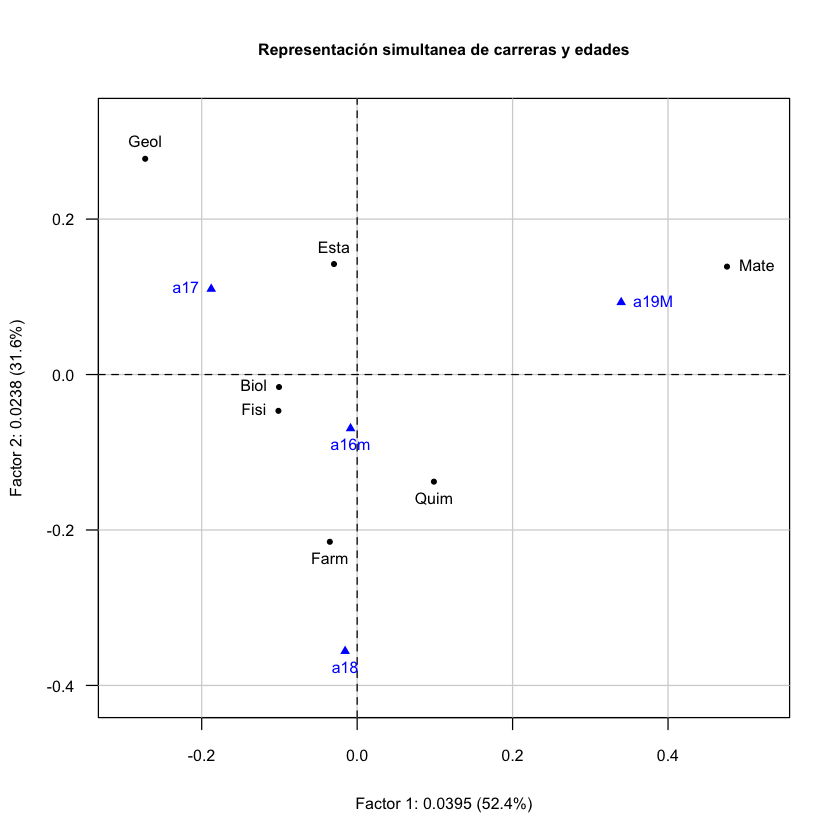

In [23]:
plot(acs,cframe=1.1,
     main="Representación simultanea de carreras y edades")

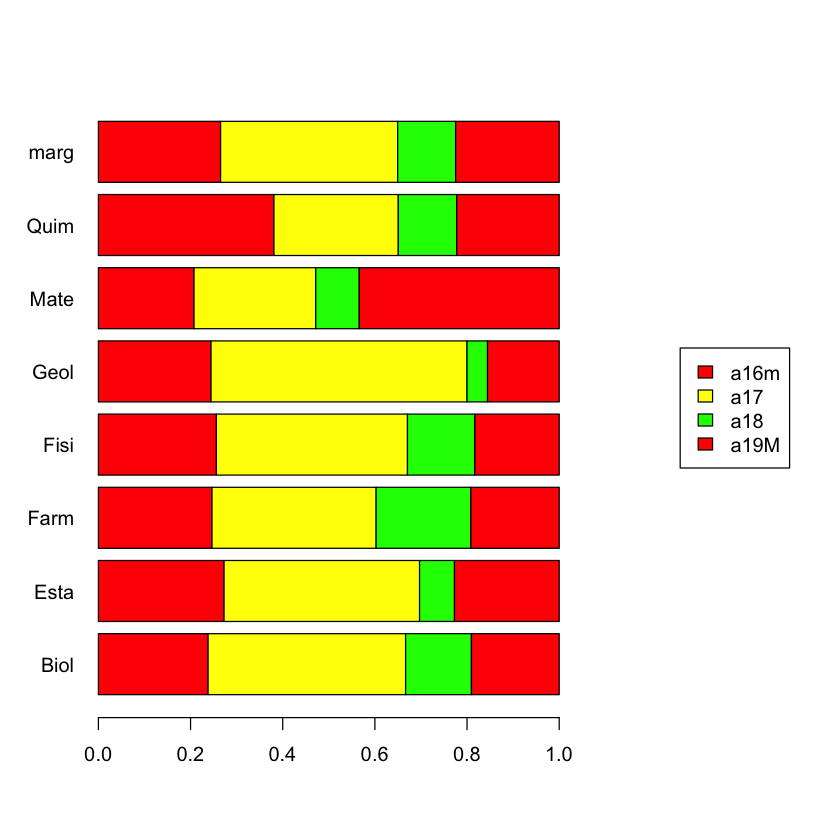

In [24]:
plotct(K,"row",col=c("red","yellow","green"))

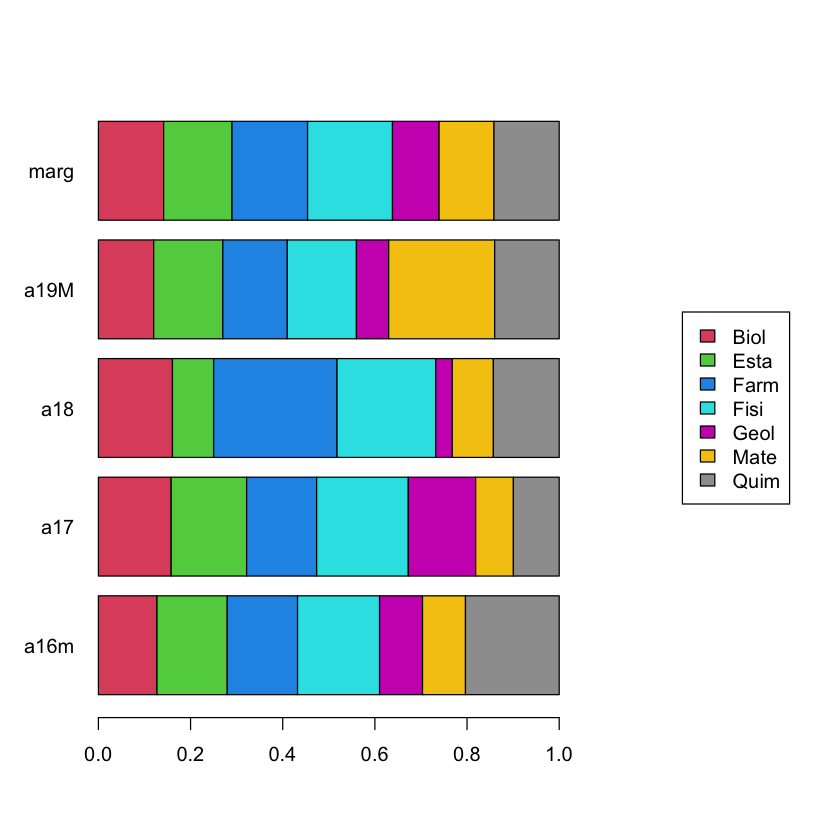

In [25]:
plotct(t(K),"row",col=2:8)

La representación simultánea permite la lectura de los planos de perfiles y columna, ya realizadada y adicionalmente la lectura simultánea como la atracción o "jalonamiento" de las  coordenadas de los perfiles columna a cada una de las filas y, simétricamente, los de las filas a cada uno los perfiles columna.  La posición de Matemáticas sobre el primer eje se debe a que *a19M* la jalona, porque Matemáticas tiene mayor proporción de 19 o más años de edad que los demás perfiles y a que *a19M* tiene una coordenada positiva alejada del centro. 

[Volver al inicio](#Contenido)

# **Ayudas para la interpretación**

**Contribución absoluta** La contribución de un perfil a la varianza del eje (inercia proyectada), depende del peso y de la coordenada al cuadrado: 

$$
Ca_s(i) = \dfrac{f_{i\cdot}(F_s(i))^2}{\lambda_s}
$$

**Coseno cuadrado:** calidad de la representación o contribución relativa:

$$
Cos^2_s(i) = \dfrac{(F_s(i))^2}{d^2(i,\mathbf{g})}
$$

¿Por qué cree que se da el nombre de **contribución relativa**?

$$
Cos^2_s(i) = \dfrac{F_s^2(i)}{d^2(i,\mathbf{g})} =  \dfrac{f_{i\cdot} F_s^2(i)} {f_{i\cdot} d^2(i,\mathbf{g})}
$$

Contribuciones del punto  a la inercia:  proyectada sobre el eje *s*  en el espacio completo

Inercia sobre el eje *s*: 
    
 $$
 \sum\limits_{i=1}^n f_{i\cdot} F^2_s(i)$
 $$
 
Inercia en $\mathbb{R}^p$:  
 
 $$
 \sum\limits_{i=1}^n f_{i\cdot} d^2(i,\mathbf{g})
 $$


#### Ayudas para la interpretación  del ejemplo


Tabla e hitograma de valores propios

,inertia,cum,cum(%)
,<dbl>,<dbl>,<dbl>
Ax1,0.040,0.040,52.423
Ax2,0.024,0.063,84.002
Ax3,0.012,0.075,100.000


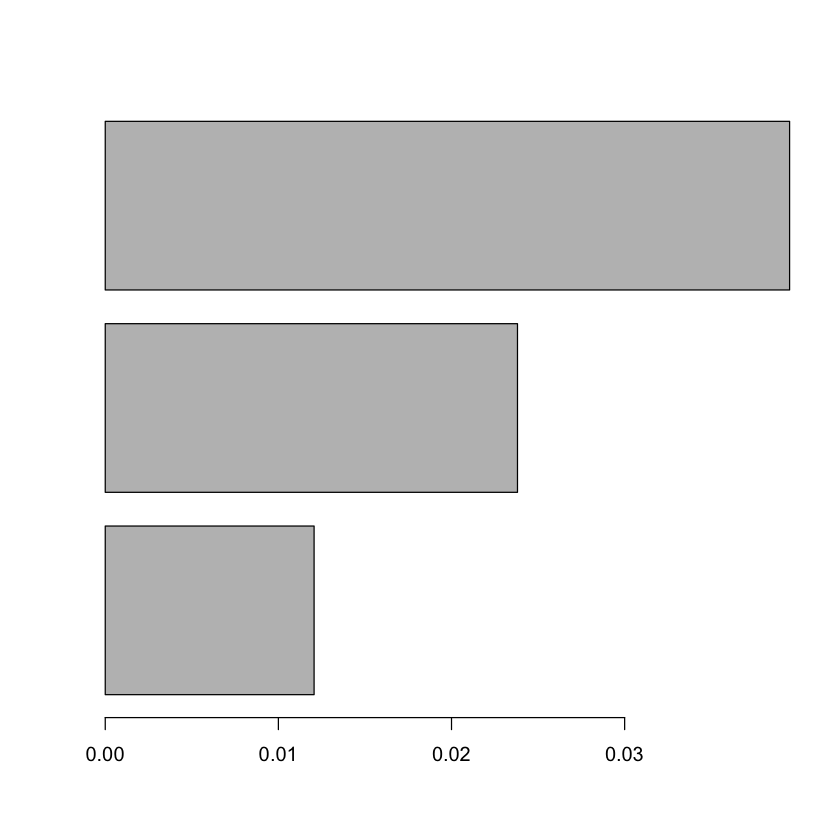

In [26]:
ayuacs<-inertia(acs,T,T)
cat("\nTabla e hitograma de valores propios")
round(ayuacs$tot.inertia,3)
barplot(acs$eig[3:1],horiz=TRUE)

In [27]:
# carreras
cat("\nCoordenadas y ayudas para la representación de las carreras")
round(cbind(acs$li,Ca=ayuacs$row.abs,cos2=ayuacs$row.rel,conInercia=ayuacs$row.contrib),2)
cat("Promedio de contribución para las carreras",round(100/7,2))


Coordenadas y ayudas para la representación de las carreras

,Axis1,Axis2,Ca.Axis1,Ca.Axis2,cos2.Axis1,cos2.Axis2,conInercia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Biol,-0.10,-0.02,3.62,0.15,-65.65,-1.68,2.89
Esta,-0.03,0.14,0.33,12.59,-3.65,83.05,4.79
Farm,-0.04,-0.22,0.51,31.90,-2.11,-79.05,12.75
Fisi,-0.10,-0.05,4.78,1.69,-74.24,-15.78,3.38
Geol,-0.27,0.28,19.03,32.73,-48.96,50.73,20.37
Mate,0.48,0.14,68.23,9.64,89.58,7.63,39.93
Quim,0.10,-0.14,3.49,11.29,11.52,-22.43,15.90


Promedio de contribución para las carreras 14.29

La contribución absoluta (Ca) promedio es un umbral para poner atención en las categorías que tienen valores por encima del promedio: en el primer eje *Geol* y *Mate*, en el segundo eje *Farm* y *Geol*.

*Quim* es la única categoría que tiene una calidad de representación en el primer plano factorial un poco baja: 11.52+22.43 = 33.95%. Los cosenos cuadros son positivos, el signo es el de la coordenada.

En el espaco completo las categorías que más contribuyen a la inercia son: *Geol*, *Mate* y *Quim*

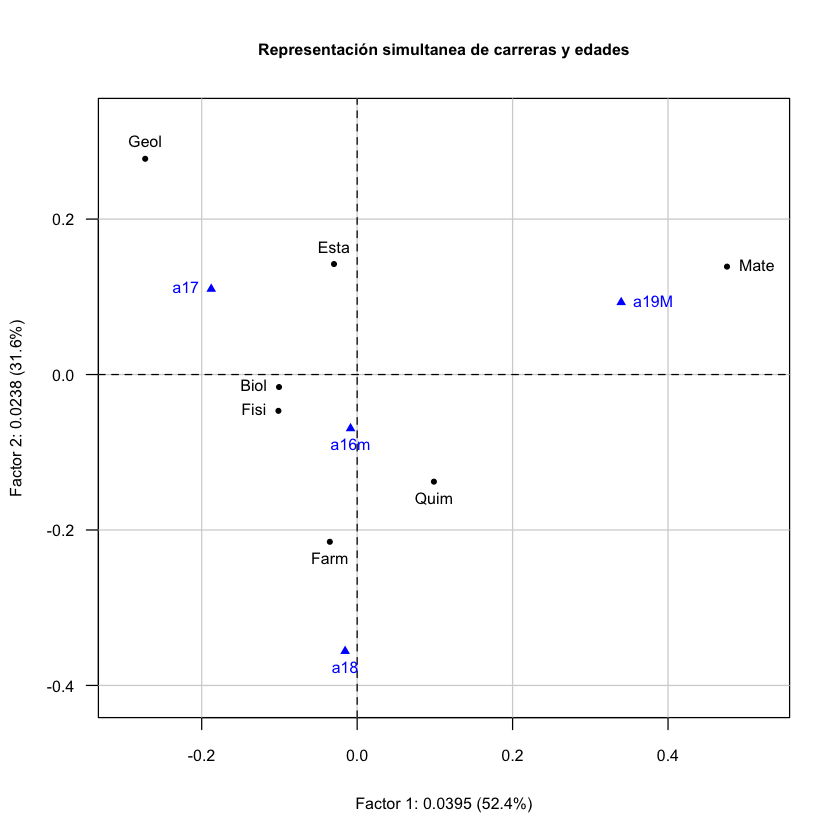

In [28]:
plot(acs,cframe=1.1,
     main="Representación simultanea de carreras y edades")

In [29]:
# edades
cat("\n\nCoordenadas y ayudas para la representación de las edades")
round(cbind(acs$co,Ca=ayuacs$col.abs,cos2=ayuacs$col.rel,conInercia=ayuacs$col.contrib),2)
cat("\nPromedio de contribución para las edades 25%")



Coordenadas y ayudas para la representación de las edades

,Comp1,Comp2,Ca.Axis1,Ca.Axis2,cos2.Axis1,cos2.Axis2,conInercia
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a16m,-0.01,-0.07,0.05,5.36,-0.20,-13.42,12.61
a17,-0.19,0.11,34.27,19.56,-70.78,24.34,25.38
a18,-0.02,-0.36,0.08,66.94,-0.16,-86.48,24.44
a19M,0.34,0.09,65.61,8.15,91.55,6.85,37.57



Promedio de contribución para las edades 25%

Las contribuciones absolutas *Ca* suman 100% en cada eje, vale la pena poner atención en las categorías que son superiors al promedio 100/4 = 25%: en el primer eje *a17* y *a19M*, en el segundo eje *a18*.

Los cosenos cuadrados son indicadores de la calidad de la proyección, la suma por ejes es 100%, los siempre positivos, pero la salida de *inertia.dudi{ade4}* les agrega el signo de la coordenada. Los cosenos cuadrados en el primer plano son la suma de los cosenos cuadrados sobre los ejes 1 y 2. Solo *a16m* n tiene buena calidad de representación en el primer plano.

La última columna es la contribución a la inercia en el espacio total, $\Re^3$ en este ejemplo.

[Volver al inicio](#Contenido)

# **Filas y columnas suplementarias**

- Se proyectan e interpretan utilizando las fórmulas de transición.
- Su interpretación debe hacerse después de la de los elementos activos.
- AYUDAS
    -  Distancia al origen
    -  Coseno cuadrado
    -  Valor test


[Volver al inicio](#Contenido)

FIN